In [1]:
%pylab inline
import uproot
import mplhep as hep
import pandas as pd
plt.style.use(hep.styles.CMS)
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/prototype_looper/BDT/helpers/")
import utils

Populating the interactive namespace from numpy and matplotlib


In [23]:
df = pd.read_pickle("../balaji_zipped.pkl")

df["target"] = np.zeros(len(df))
df.loc[df["process_id"] < 0, "target"] = 1
df = df.loc[(df["process_id"] != 2) & (df["process_id"]) >= -4 ]
df = df.loc[df["process_id"] != 0]

### Step 1 - Compare ROC of Category 7 with and without the extra variables

In [3]:
Category = 8
selection_string = (df["Category"] == Category) & (df["train_label"] == 1)
results = utils.calc_roc_and_unc(df.loc[selection_string, "target"], df.loc[selection_string, "mva_score"], df.loc[selection_string, "weight"])

selection_string = (df_original["Category"] == Category) & (df_original["train_label"] == 1)
results_original = utils.calc_roc_and_unc(df_original.loc[selection_string, "target"], df_original.loc[selection_string, "mva_score"], df_original.loc[selection_string, "weight"])

plot(results["fpr"], results["tpr"], label="With Isolation variable, AUC = {:0.3f}".format(results["auc"]))
plot(results_original["fpr"], results_original["tpr"], label="Without Isolation variable, AUC = {:0.3f}".format(results_original["auc"]))
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC for Category = {}".format(Category))
plt.legend()

NameError: name 'df_original' is not defined

In [ ]:
print(list(df.columns))

## Step 2 - Compare effects of non-resonant BDT on resonant samples

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


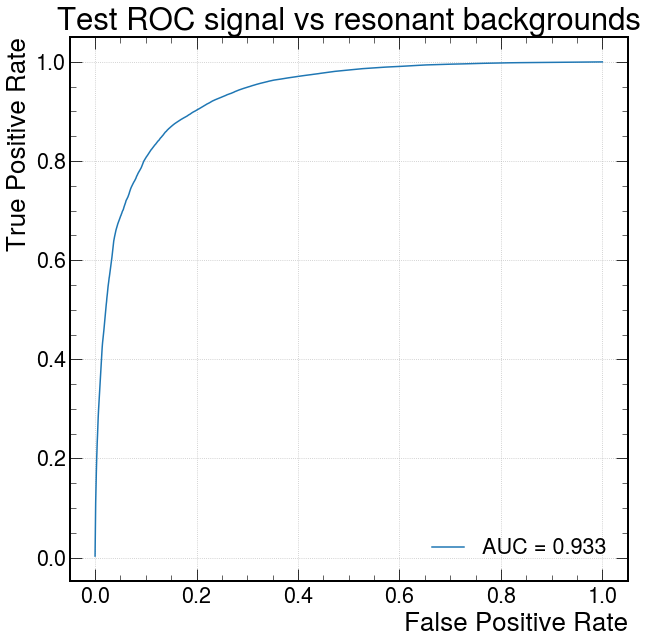

In [42]:
selection_string = ((df["process_id"] < 0) | (df["process_id"] >= 9)) & (df["train_label"] == 1)
results = utils.calc_roc_and_unc(df.loc[selection_string, "target"], df.loc[selection_string, "mva_score"], df.loc[selection_string, "weight"])

plot(results["fpr"], results["tpr"], label="AUC = {:0.3f}".format(results["auc"]))
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC signal vs resonant backgrounds".format(Category))
plt.legend()
plt.savefig("auc_v_resonant.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0.9738245537570165


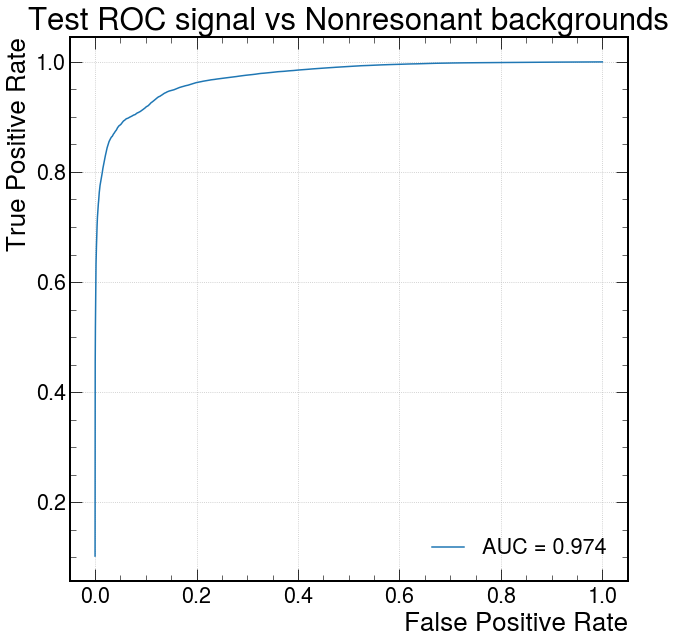

In [46]:
selection_string = (df["process_id"] < 9) & (df["train_label"] == 1)
results = utils.calc_roc_and_unc(df.loc[selection_string, "target"], df.loc[selection_string, "mva_score"], df.loc[selection_string, "weight"])

plot(results["fpr"], results["tpr"], label="AUC = {:0.3f}".format(results["auc"]))
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC signal vs Nonresonant backgrounds".format(Category))
plt.legend()
plt.savefig("auc_v_nonresonant.pdf")

print(results["auc"])

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0.9737370092693065


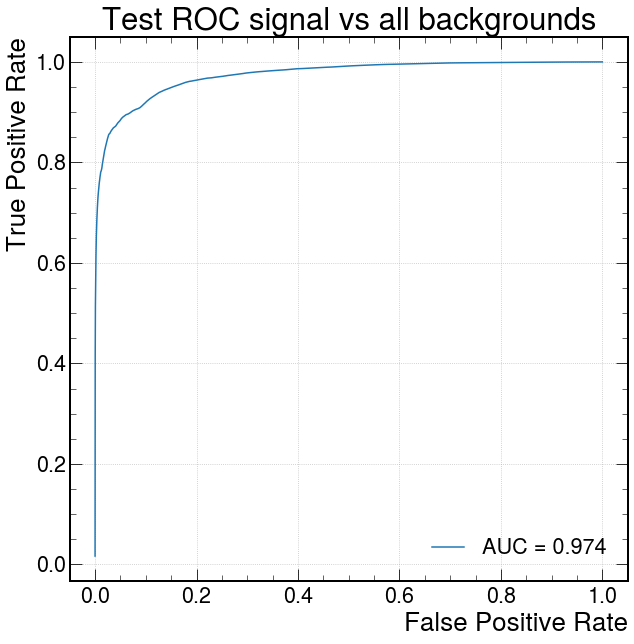

In [45]:
selection_string = (df["train_label"] == 1) 
results = utils.calc_roc_and_unc(df.loc[selection_string, "target"], df.loc[selection_string, "mva_score"], df.loc[selection_string, "weight"])

plot(results["fpr"], results["tpr"], label="AUC = {:0.3f}".format(results["auc"]))
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC signal vs all backgrounds".format(Category))
plt.legend()
plt.savefig("auc_v_all.pdf")

print(results["auc"])